In [6]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.interpolate import Rbf
from matplotlib.patches import Polygon
mpl.rcParams['text.usetex'] = True

In [22]:
algorithm = 'RF'
path = '/Users/miquelmiravet/Projects/IPAM_LA/ML_group/IPAM2021_ML/Classification/Probabilities/'+algorithm
sweep_parameters = pd.read_csv(path+'/sweep_v2.csv',delimiter=',')
sweep_probabilities = pd.read_csv(path+'/'+algorithm+'_sweep_probabilities.csv',delimiter=',')

In [23]:
sweep_parameters.rename(columns={'0':'M1','1':'M2','2':'chi1','3':'chi2','4':'SNR'}, inplace=True)
sweep_parameters = sweep_parameters.round(4)
display(sweep_parameters)

,M1,M2,chi1,chi2,SNR
0,1.397,1.0000,0.0,0.0,10.0
1,1.794,1.0000,0.0,0.0,10.0
2,1.794,1.3970,0.0,0.0,10.0
3,2.191,1.0000,0.0,0.0,10.0
4,2.191,1.3970,0.0,0.0,10.0
...,...,...,...,...,...
79595,80.000,78.0151,1.0,1.0,10.0
79596,80.000,78.4121,1.0,1.0,10.0
79597,80.000,78.8090,1.0,1.0,10.0
79598,80.000,79.2060,1.0,1.0,10.0


In [24]:
sweep_parameters['P_NS'] = sweep_probabilities['P_NS']
sweep_parameters['P_REM'] = sweep_probabilities['P_REM']

Locator attempting to generate 1000 ticks ([-0.001, ..., 0.998]), which exceeds Locator.MAXTICKS (1000).


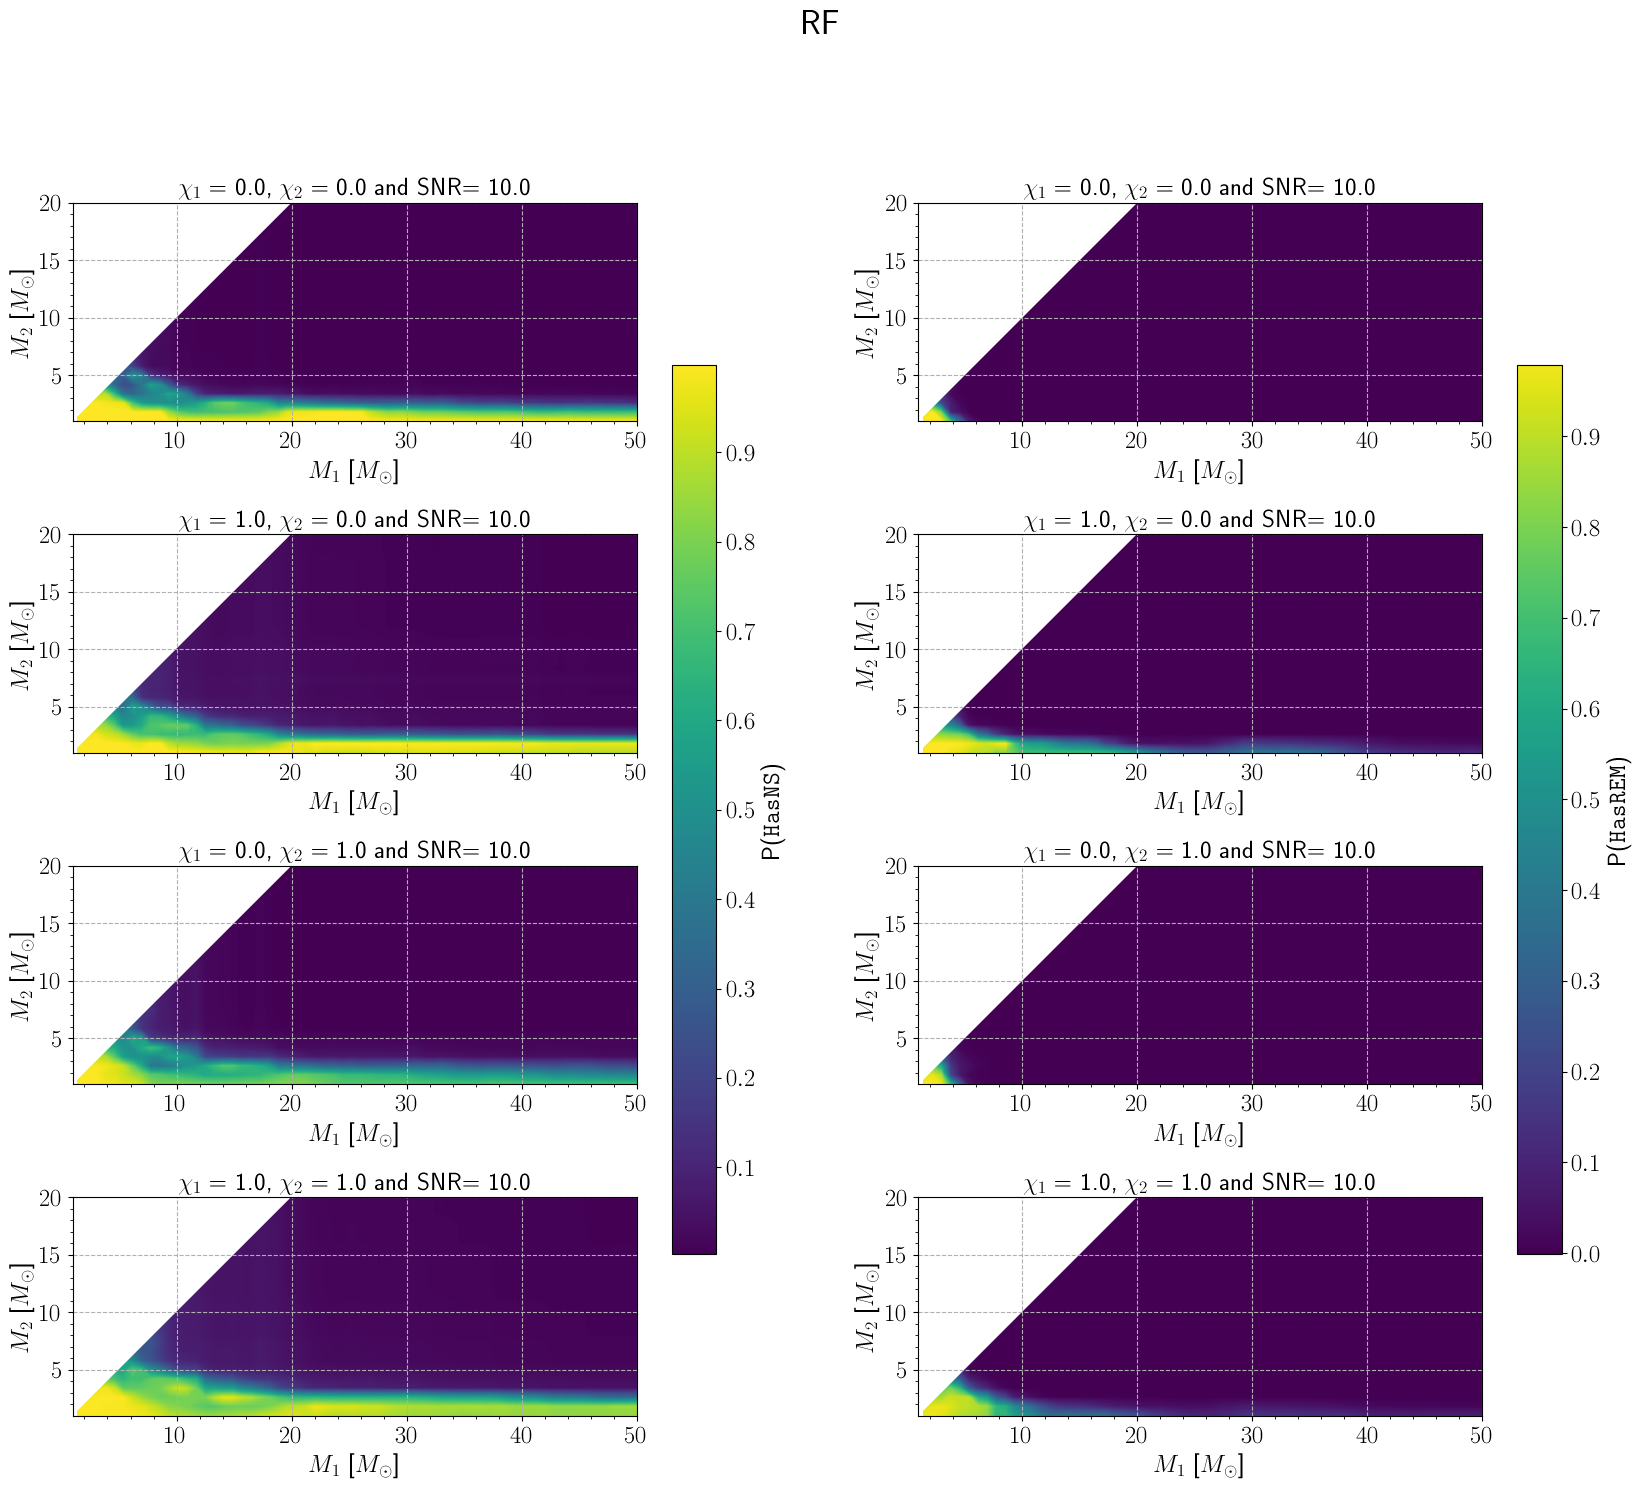

In [25]:
fig, ax = plt.subplots(4,2, figsize = (20,16.5))

params = [[0.0,0.0,10.0],[1.0,0.0,10.0],[0.0,1.0,10.0],[1.0,1.0,10.0]]

fig.suptitle(algorithm, fontsize = 25)

for i,pp in enumerate(params):
    
    chi1 = pp[0]
    chi2 = pp[1]
    SNR = pp[2]
    
    chi_select = sweep_parameters.loc[np.logical_and(sweep_parameters['chi1'] == chi1, \
                                                 sweep_parameters['chi2'] == chi2)]

    snr_chi_select = chi_select.loc[chi_select['SNR']==SNR]
    
    x = pd.Series(snr_chi_select['M1'])
    y = pd.Series(snr_chi_select['M2'])

    xi, yi = np.linspace(np.min(x), np.max(x), 100), np.linspace(np.min(y), np.max(y), 100)
    xi, yi = np.meshgrid(xi, yi)
    
    z_ns = pd.Series(snr_chi_select['P_NS'])
    
    rbf_ns = Rbf(x, y, z_ns, function='linear')
    zi_ns = rbf_ns(xi, yi)
    
    ax[i,0].set_aspect('equal')
    ax[i,1].set_aspect('equal')

    ax[i,0].tick_params(axis='x', labelsize=18)
    ax[i,1].tick_params(axis='x', labelsize=18)
    ax[i,0].tick_params(axis='y', labelsize=18)
    ax[i,1].tick_params(axis='y', labelsize=18)

    cont0 = ax[i,0].contourf(xi, yi, zi_ns, 1000, cmap='viridis')

  #  cbar = ax[i,0].colorbar(norm=mpl.colors.Normalize(vmin=0, vmax=1))
  #  cbar.set_label('P(NS)',fontsize=18)
  #  cbar.set_ticks(np.linspace(0,1,11))
    
    triangle_points = np.array([[0,0], [0,100], [100,100]])
    triangle = Polygon(triangle_points, facecolor='w')
    ax[i,0].add_patch(triangle)
    
    z_rem = pd.Series(snr_chi_select['P_REM'])
    
    rbf_rem = Rbf(x, y, z_rem, function='linear')
    zi_rem = rbf_rem(xi, yi)
    
    cont1 = ax[i,1].contourf(xi, yi, zi_rem, 1000, cmap='viridis')
    
    triangle_points = np.array([[0,0], [0,100], [100,100]])
    triangle = Polygon(triangle_points, facecolor='w')
    ax[i,1].add_patch(triangle)
    
 #   ax[i,1].add_patch(triangle)

    ax[i,0].set_xlim([1,50])
    ax[i,0].set_ylim([1,20])
    ax[i,1].set_xlim([1,50])
    ax[i,1].set_ylim([1,20])
    ax[i,0].set_xlabel(r'$M_1$ [$M_{\odot}$]',fontsize=18)
    ax[i,0].set_ylabel(r'$M_2$ [$M_{\odot}$]',fontsize=18)
    ax[i,0].minorticks_on()
    ax[i,0].grid(which='major',ls='--')
    ax[i,1].minorticks_on()
    ax[i,1].grid(which='major',ls='--')
    ax[i,0].set_title(r'$\chi_1=$ %s, $\chi_2=$ %s and SNR= %s' %(str(chi1),str(chi2),str(SNR)),fontsize=18)
    ax[i,1].set_xlabel(r'$M_1$ [$M_{\odot}$]',fontsize=18)
    ax[i,1].set_ylabel(r'$M_2$ [$M_{\odot}$]',fontsize=18)
    ax[i,1].minorticks_on()
    ax[i,1].grid(which='major',ls='--')
    ax[i,1].set_title(r'$\chi_1=$ %s, $\chi_2=$ %s and SNR= %s' %(str(chi1),str(chi2),str(SNR)),fontsize=18)
    
cbar = fig.colorbar(cont0, norm=mpl.colors.Normalize(vmin=0, vmax=1), ax = ax[:,0],  shrink = 0.7)
cbar.set_label(r'P(\texttt{HasNS})',fontsize=18)
cbar.set_ticks(np.linspace(0,1,11))
cbar.ax.tick_params(labelsize=18)
cont0.set_clim(0,1)

cbar = fig.colorbar(cont1, norm=mpl.colors.Normalize(vmin=0, vmax=1), ax = ax[:,1], shrink = 0.7)
cbar.set_label(r'P(\texttt{HasREM})',fontsize=18)
cbar.set_ticks(np.linspace(0,1,11))
cbar.ax.tick_params(labelsize=18)
cont1.set_clim(0,1)

plt.savefig(algorithm+'_parameter_sweep.png',dpi=300, facecolor="w")